Rock-Paper-Scissors Classifier
By : Steven Jonathan 

Download Dataset

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-05 12:37:52--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  7.42MB/s    in 67s     

2021-07-05 12:39:00 (4.63 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Buat Directory

In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 

Split Data (40% - validate, 60% - test)

In [ ]:
!pip install split_folders tqdm

In [ ]:

import os
import shutil
import splitfolders

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

splitfolders.ratio(base_dir,
                    output ='/tmp/rockpaperscissors/data_set',
                    seed=None, ratio=(0.6,0.4)) 

Copying files: 2188 files [00:00, 2570.79 files/s]


In [ ]:
# Rock
rock_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/rock') #jumlah gambar rock
train_rock_dir = os.path.join('/tmp/rockpaperscissors/data_set/train/rock') #jumlah gambar train rock
val_rock_dir = os.path.join('/tmp/rockpaperscissors/data_set/val/rock') #jumlah gambar validation rock

# Paper
paper_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/paper')
train_paper_dir = os.path.join('/tmp/rockpaperscissors/data_set/train/paper')
val_paper_dir = os.path.join('/tmp/rockpaperscissors/data_set/val/paper')

# Scissors
scissors_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images/scissors')
train_scissors_dir = os.path.join('/tmp/rockpaperscissors/data_set/train/scissors')
val_scissors_dir = os.path.join('/tmp/rockpaperscissors/data_set/val/scissors')



print("Rock")
print('Total Image :', len(os.listdir(rock_dir)))
print('Jumlah Train Data', len(os.listdir(train_rock_dir)))
print('Jumlah Validasi Data:', len(os.listdir(val_rock_dir)))

print('\n')

print("Paper")
print('Total Image :', len(os.listdir(paper_dir)))
print('Jumlah Train Data', len(os.listdir(train_paper_dir)))
print('Jumlah Validasi Data:', len(os.listdir(val_paper_dir)))

print('\n')

print("Scissors")
print('Total Image :', len(os.listdir(scissors_dir)))
print('Jumlah Train Data', len(os.listdir(train_scissors_dir)))
print('Jumlah Validasi Data:', len(os.listdir(val_scissors_dir)))


Rock
Total Image : 726
Jumlah Train Data 435
Jumlah Validasi Data: 291


Paper
Total Image : 712
Jumlah Train Data 427
Jumlah Validasi Data: 285


Scissors
Total Image : 750
Jumlah Train Data 450
Jumlah Validasi Data: 300


Train Our Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
validate_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_dir = '/tmp/rockpaperscissors/data_set/train'
validation_dir = '/tmp/rockpaperscissors/data_set/val'

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena kita merupakan masalah klasifikasi 
        # lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = validate_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        # karena kita merupakan masalah 
        # klasifikasi lebih dari 2 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=15, 
    steps_per_epoch=15,
    validation_data = validation_generator,
    verbose = 2,
    validation_steps=5)

Epoch 1/15
15/15 - 25s - loss: 0.4236 - accuracy: 0.8500 - val_loss: 0.3311 - val_accuracy: 0.9062
Epoch 2/15
15/15 - 25s - loss: 0.3267 - accuracy: 0.8875 - val_loss: 0.2449 - val_accuracy: 0.9062
Epoch 3/15
15/15 - 25s - loss: 0.3452 - accuracy: 0.8667 - val_loss: 0.2623 - val_accuracy: 0.9125
Epoch 4/15
15/15 - 25s - loss: 0.3556 - accuracy: 0.8646 - val_loss: 0.2722 - val_accuracy: 0.9000
Epoch 5/15
15/15 - 25s - loss: 0.3259 - accuracy: 0.8917 - val_loss: 0.1817 - val_accuracy: 0.9375
Epoch 6/15
15/15 - 25s - loss: 0.2538 - accuracy: 0.9271 - val_loss: 0.1755 - val_accuracy: 0.9312
Epoch 7/15
15/15 - 25s - loss: 0.2018 - accuracy: 0.9271 - val_loss: 0.2112 - val_accuracy: 0.9125
Epoch 8/15
15/15 - 25s - loss: 0.2140 - accuracy: 0.9312 - val_loss: 0.1286 - val_accuracy: 0.9625
Epoch 9/15
15/15 - 25s - loss: 0.2153 - accuracy: 0.9187 - val_loss: 0.1580 - val_accuracy: 0.9438
Epoch 10/15
15/15 - 25s - loss: 0.2275 - accuracy: 0.9208 - val_loss: 0.1519 - val_accuracy: 0.9500
Epoch 11/

Training Perfomance

Text(0.5, 1.0, 'Accuracy evolution')

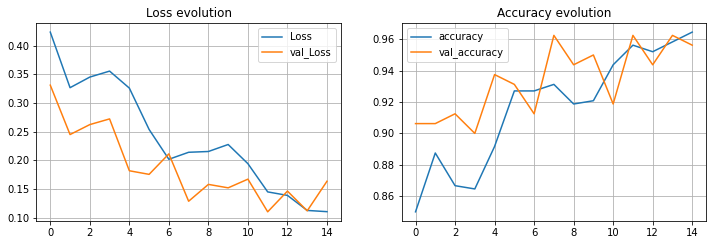

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

Prediksi Gambar

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx.png
0Og76sl5CJhbxWWx.png
paper


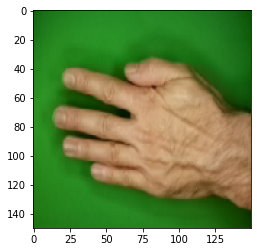

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)

  if classes[0][0] == 1:
    print("paper")
  elif classes[0][1] == 1:
    print("rock")
  elif classes[0][2] == 1:
    print("scissors")
  else:
    print("Uknown")